In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "yashshah0206"
os.environ['KAGGLE_KEY'] = "d957bd0f8e833c9a36eddb0c34d1f47c"

In [3]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [6]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [7]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

Because the data is imbalanced, we need to deal with it too.

In [8]:
import cv2

In [13]:
img = cv2.imread('COVID-19_Radiography_Dataset/COVID/images/COVID-1.png')

In [11]:
import matplotlib.pyplot as plt

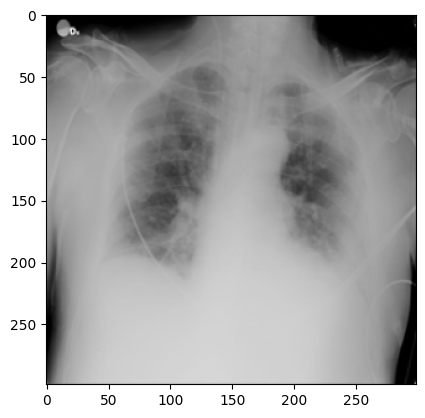

In [14]:
plt.imshow(img)

In [15]:
img.shape

(299, 299, 3)

The resolution of all the images are 299 x 299 according to what is mentioned in the dataset

In [27]:
import pandas as pd
import numpy as np

In [19]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.8 MB/s eta 0:00:00


In [20]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [21]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [22]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [23]:
path = 'COVID-19_Radiography_Dataset/COVID/images' + urls[0]

In [24]:
path

'COVID-19_Radiography_Dataset/COVID/imagesCOVID-1724.png'

In [40]:
def loadImages(path, urls, target):
  images = []
  labels = []

  for i in range(len(urls)):
    image_path = path + '/' + urls[i]
    image = cv2.imread(image_path)
    # to resize images - in this case they are already of 1 single size, but in other cases we can:
    # img = cv2.resize(img, (100, 100))
    images.append(image)
    labels.append(target)

  return images, labels

In [41]:
covid_path = 'COVID-19_Radiography_Dataset/COVID/images'
covid_url = os.listdir('COVID-19_Radiography_Dataset/COVID/images')
covidImages, covidTargets = loadImages(covid_path, covid_url, 1)

In [42]:
normal_path = 'COVID-19_Radiography_Dataset/Normal/images'
normal_url = os.listdir('COVID-19_Radiography_Dataset/Normal/images')
normalImages, normalTargets = loadImages(normal_path, normal_url, 0)

In [43]:
covidImages = np.asarray(covidImages)

In [44]:
normalImages = np.asarray(normalImages)

In [45]:
covidImages.shape, normalImages.shape

((3616, 299, 299, 3), (10192, 299, 299, 3))

array([[[ 50,  50,  50],
        [ 50,  50,  50],
        [ 51,  51,  51],
        ...,
        [ 33,  33,  33],
        [ 34,  34,  34],
        [ 33,  33,  33]],

       [[ 51,  51,  51],
        [ 53,  53,  53],
        [ 54,  54,  54],
        ...,
        [ 38,  38,  38],
        [ 39,  39,  39],
        [ 38,  38,  38]],

       [[ 54,  54,  54],
        [ 58,  58,  58],
        [ 66,  66,  66],
        ...,
        [ 42,  42,  42],
        [ 43,  43,  43],
        [ 44,  44,  44]],

       ...,

       [[102, 102, 102],
        [113, 113, 113],
        [123, 123, 123],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [140, 140, 140]],

       [[104, 104, 104],
        [113, 113, 113],
        [123, 123, 123],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[105, 105, 105],
        [115, 115, 115],
        [129, 129, 129],
        ...,
        [ 47,  47,  47],
        [ 45,  45,  45],
        [ 37,  37,  37]]], dtype=uint8)
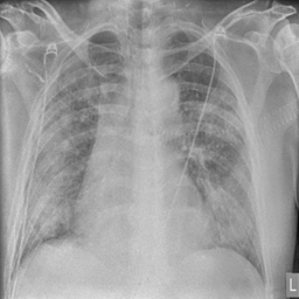

In [46]:
covidImages[0]

In [47]:
covidImages.shape

(3616, 299, 299, 3)

In [48]:
normalImages.shape

(10192, 299, 299, 3)

In [50]:
data = np.r_[covidImages, normalImages]
# we stacked the images to get out x_train

In [51]:
data.shape

(13808, 299, 299, 3)

In [52]:
targets = np.r_[covidTargets, normalTargets]

In [53]:
targets.shape

(13808,)

In [54]:
data = data / 255.0

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size = 0.25)

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [62]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (299, 299, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 148, 148, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 16)       

In [64]:
  model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [66]:
model.fit(
    x_train, y_train,
    batch_size=32, epochs=5,
    validation_data=(x_test, y_test)
    )

Epoch 1/5
324/324 [==============================] - 170s 523ms/step - loss: 0.2997 - accuracy: 0.8716 - val_loss: 0.2539 - val_accuracy: 0.8966
Epoch 2/5
324/324 [==============================] - 163s 503ms/step - loss: 0.2242 - accuracy: 0.9086 - val_loss: 0.2076 - val_accuracy: 0.9267
Epoch 3/5
324/324 [==============================] - 165s 508ms/step - loss: 0.1616 - accuracy: 0.9387 - val_loss: 0.1659 - val_accuracy: 0.9400
Epoch 4/5
324/324 [==============================] - 164s 506ms/step - loss: 0.1180 - accuracy: 0.9546 - val_loss: 0.1450 - val_accuracy: 0.9444
Epoch 5/5
324/324 [==============================] - 165s 511ms/step - loss: 0.0862 - accuracy: 0.9692 - val_loss: 0.1538 - val_accuracy: 0.9415


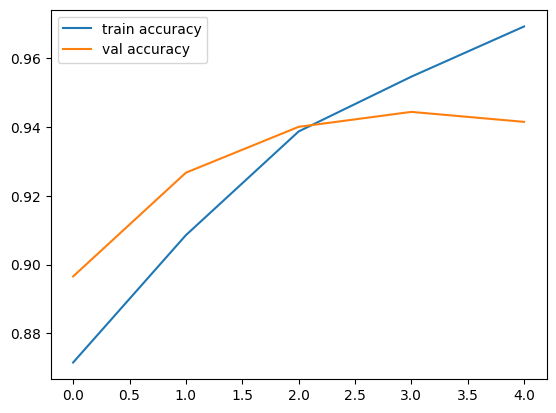

In [68]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

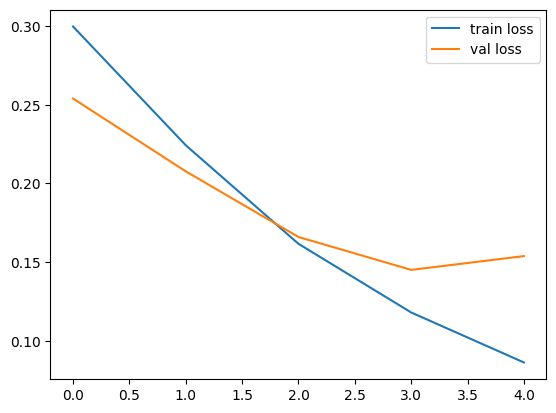

In [69]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [78]:
def predict(img):
  """Predicts the class of an image (Covid or Normal)."""
  img = cv2.resize(img, (299, 299))  # Resize the image
  prediction = model.predict(img.reshape(1, 299, 299, 3))
  if prediction > 0.5:
    print('Covid')
  else:
    print('Normal')

In [81]:
img = cv2.imread('/content/covid_test.png')

In [82]:
predict(img)

1/1 [==============================] - 0s 34ms/step
Covid


In [83]:
img2 = cv2.imread('/content/normal_test.png')

In [84]:
predict(img2)

1/1 [==============================] - 0s 33ms/step
Normal
